## Import Library 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

## Import Dataset 

Dataset berisi data tentang produksi (Production) dan luas panen (Harvest Area) dari sektor pertanian dalam beberapa periode waktu tertentu. Berikut adalah penjelasan untuk setiap kolom:

- **Production (X):**

Ini adalah kolom yang mewakili jumlah atau volume produksi suatu tanaman atau komoditas pada periode waktu tertentu. Satuan pengukuran dari kolom ini tidak diberikan dalam konteks dataset yang disediakan, namun mungkin bisa dalam satuan seperti ton, kilogram, atau unit lainnya tergantung pada sumber data.

- **Harvest Area (Y):**

Ini adalah kolom yang mewakili luas lahan yang dipanen pada periode waktu yang sesuai dengan produksi. Luas panen ini bisa diukur dalam satuan hektar, meter persegi, atau unit lainnya tergantung pada sumber data.

Dataset ini digunakan untuk menganalisis hubungan antara luas panen dan produksi suatu tanaman atau komoditas. Secara khusus, kolom *Production* (X) dapat dianggap sebagai variabel independen (variabel penjelas) dan kolom *Harvest Area* (Y) sebagai variabel dependen (variabel yang ingin diprediksi). 

In [18]:
df = pd.read_csv('R02_rice_field.csv')
# head() digunakan untuk menampilkan barisan awal dataset
df.head()

,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0


## Data Preprocessing

describe() digunakan untuk memberi gambaran statistik deskriptif tentang distribusi data dalam DataFrame. 

In [5]:
df.describe()

,Production (X),Harvest Area (Y)
count,2.240000e+02,224.000000
mean,1.679701e+06,374349.966920
std,1.161387e+06,232751.161987
min,4.293800e+04,63142.040000
25%,5.488570e+05,146919.500000
50%,1.667773e+06,373551.500000
75%,2.436851e+06,514570.250000
max,4.881089e+06,872737.000000


isna().sum() digunakan untuk mengecek apakah terdapat *null value* pada dataset, karena jika ada, kemungkinan akan menjadi outlier atau data noise.

In [7]:
df.isna().sum()

Production (X)      0
Harvest Area (Y)    0
dtype: int64

tidak ada *null value* dapat disimpulkan bahwa dataset sudah bersih.

Melihat data numerik di dalam dataset sangat beragam dan berada dalam rentang yang besar dan bervariasi, maka dilakukan normalisasi data. Teknik normalisasi data yang dilakukan adalah **_Min-Max Scalling_** untuk mengubah ukuran data dari data aslinya menjadi nilai yang berada dalam rentang 0 dan 1.

In [11]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Memilih kolom yang akan dinormalisasi
columns_to_normalize = ['Production (X)', 'Harvest Area (Y)']

# Melakukan normalisasi pada kolom-kolom yang dipilih
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Tampilkan DataFrame setelah normalisasi
df.head()

,Production (X),Harvest Area (Y)
0,0.265928,0.321700
1,0.259761,0.328435
2,0.276958,0.341048
3,0.284445,0.352128
4,0.273893,0.338958


Dilakukan pengecekan kembali dengan describe() untuk melihat apakah normalisasi berhasil.

In [12]:
df.describe()

,Production (X),Harvest Area (Y)
count,224.000000,224.000000
mean,0.338303,0.384400
std,0.240048,0.287491
min,0.000000,0.000000
25%,0.104569,0.103481
50%,0.335838,0.383413
75%,0.494799,0.557598
max,1.000000,1.000000


dapat dilihat jika min = 0 dan max = 1, yang artinya preprocessing data sudah berhasil dilakukan.

## Model Regresi Linear

In [14]:
# Pisahkan data menjadi fitur (X) dan label (y)
X = df.drop('Harvest Area (Y)', axis=1)
y = df['Harvest Area (Y)']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Regresi Linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print coefficients dan metrik evaluasi
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Coefficients: [1.06968652]
Intercept: 0.019811812485091507
Mean Squared Error (MSE): 0.009066286395377626
R-squared (R2): 0.8546683225108226
Mean Absolute Error (MAE): 0.0641849928502576
Mean Absolute Percentage Error (MAPE): 1.1383049235768596
Root Mean Squared Error (RMSE): 0.09521704886929455


In [20]:
# Buat DataFrame untuk data uji
df_test = pd.DataFrame({'X': X_test['Production (X)'], 'Y': y_test, 'Predicted (Y)': y_pred})

# Tampilkan DataFrame
print(df_test)

            X         Y  Predicted (Y)
9    0.262751  0.311253       0.300873
84   0.081304  0.102509       0.106781
117  0.104862  0.142817       0.131981
144  0.317158  0.502137       0.359072
221  0.505504  0.554350       0.560542
113  0.107848  0.149318       0.135175
68   0.385365  0.449370       0.432031
104  0.080859  0.068400       0.106305
177  0.069630  0.057284       0.094294
185  0.097957  0.087064       0.124595
55   0.420273  0.401990       0.469372
15   0.280965  0.328519       0.320356
199  0.398665  0.558366       0.446259
25   0.353246  0.329021       0.397675
30   0.639003  0.904206       0.703345
45   0.731553  0.854170       0.802344
171  0.073177  0.072613       0.098088
82   0.297646  0.306980       0.338200
208  0.430166  0.535324       0.479954
97   0.000000  0.090212       0.019812
93   0.073108  0.081378       0.098014
18   0.357580  0.392226       0.402310
79   0.505356  0.196814       0.560385
141  0.269664  0.443391       0.308267
147  0.376322  0.608063  

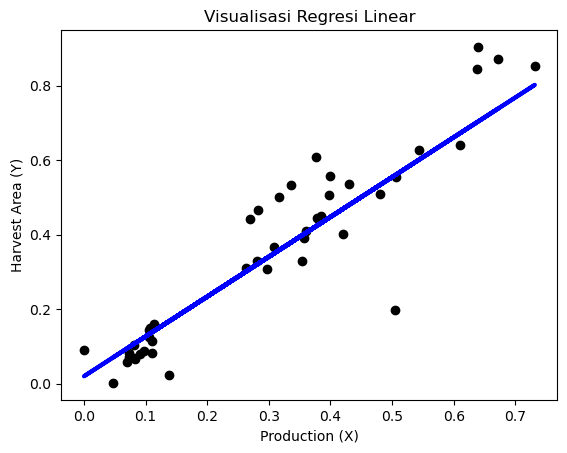

In [16]:
# Plot grafik regresi
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Production (X)')
plt.ylabel('Harvest Area (Y)')
plt.title('Visualisasi Regresi Linear')
plt.show()